# Tree Methods Project



**Goal: Create a model to predict whether or not a customer will Churn .**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [22]:
df.astype('object').describe().transpose()

,count,unique,top,freq
customerID,7032,7032,5804-JMYIO,1
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
tenure,7032,72,1,613
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**Missing data?**

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Balance of the class labels (Churn) with a Count Plot.**

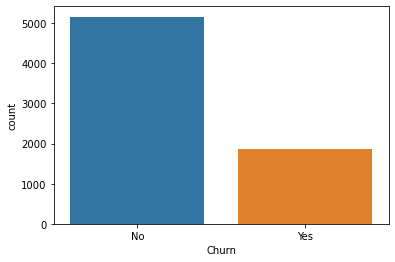

In [8]:
sns.countplot(data=df,x='Churn');

**TotalCharges between Churn categories with a Box Plot or Violin Plot.**

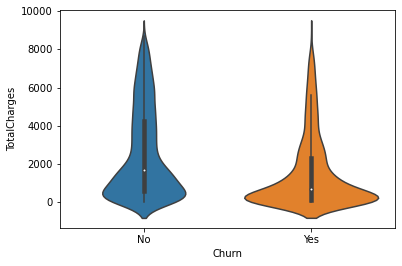

In [11]:
sns.violinplot(data=df,x='Churn',y='TotalCharges');

**Boxplot showing the distribution of TotalCharges per Contract type, also added in a hue coloring based on the Churn class.**

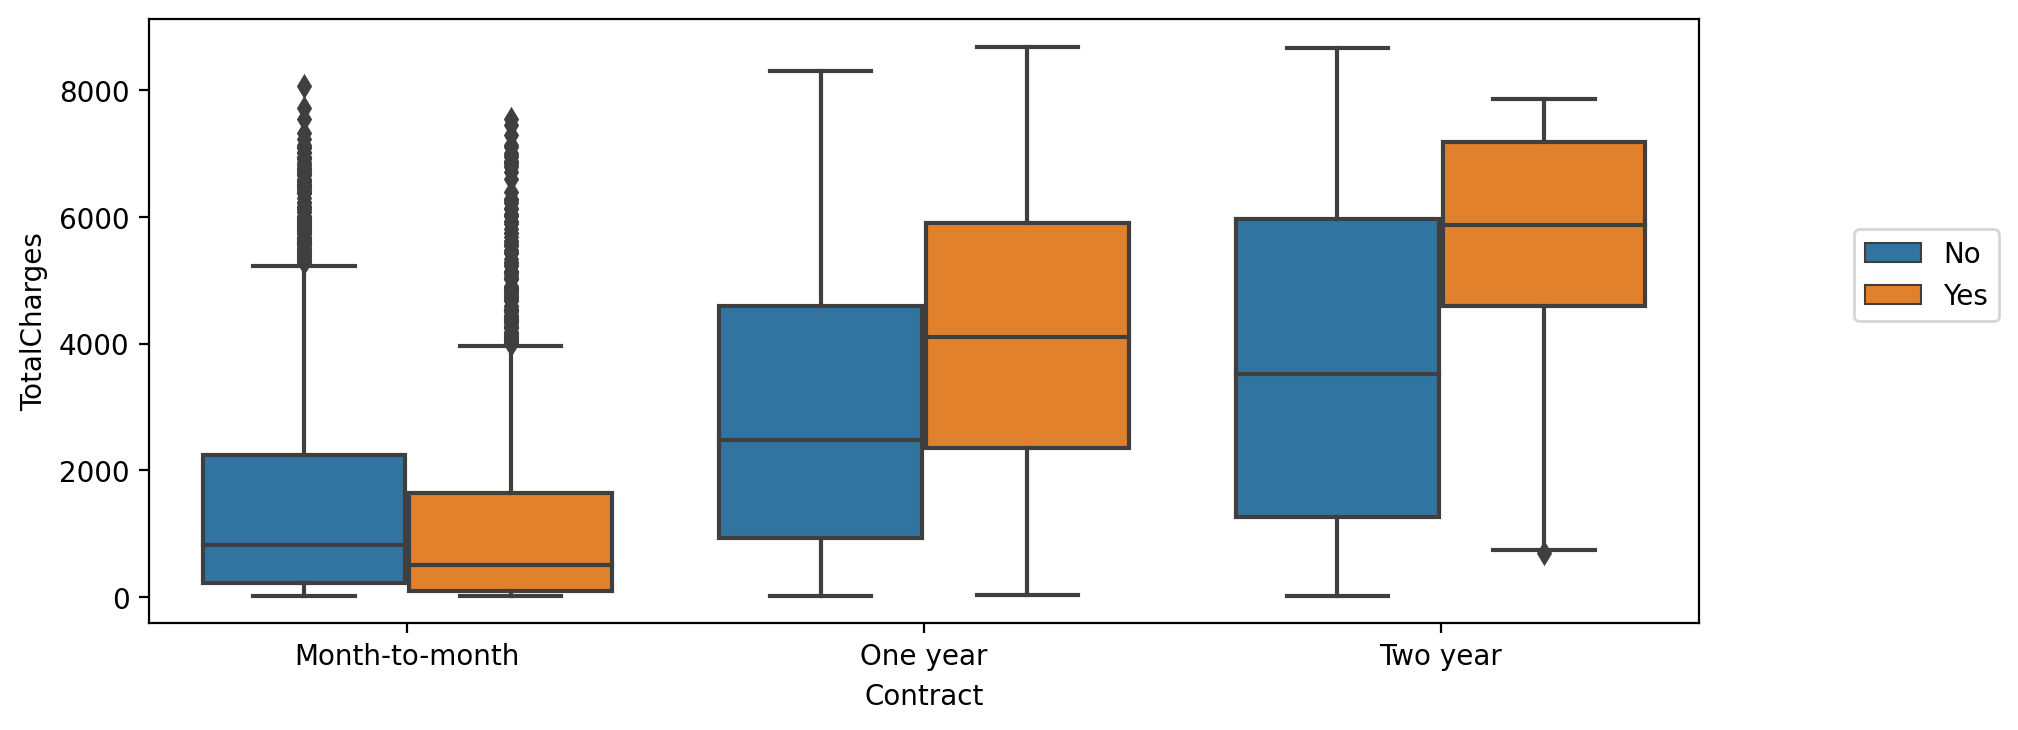

In [15]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')
plt.legend(loc=(1.1,0.5));

**Creating a bar plot showing the correlation of the following features to the class label.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [19]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [27]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

In [28]:
temp=corr_df['Churn_Yes'].sort_values().iloc[1:-1]

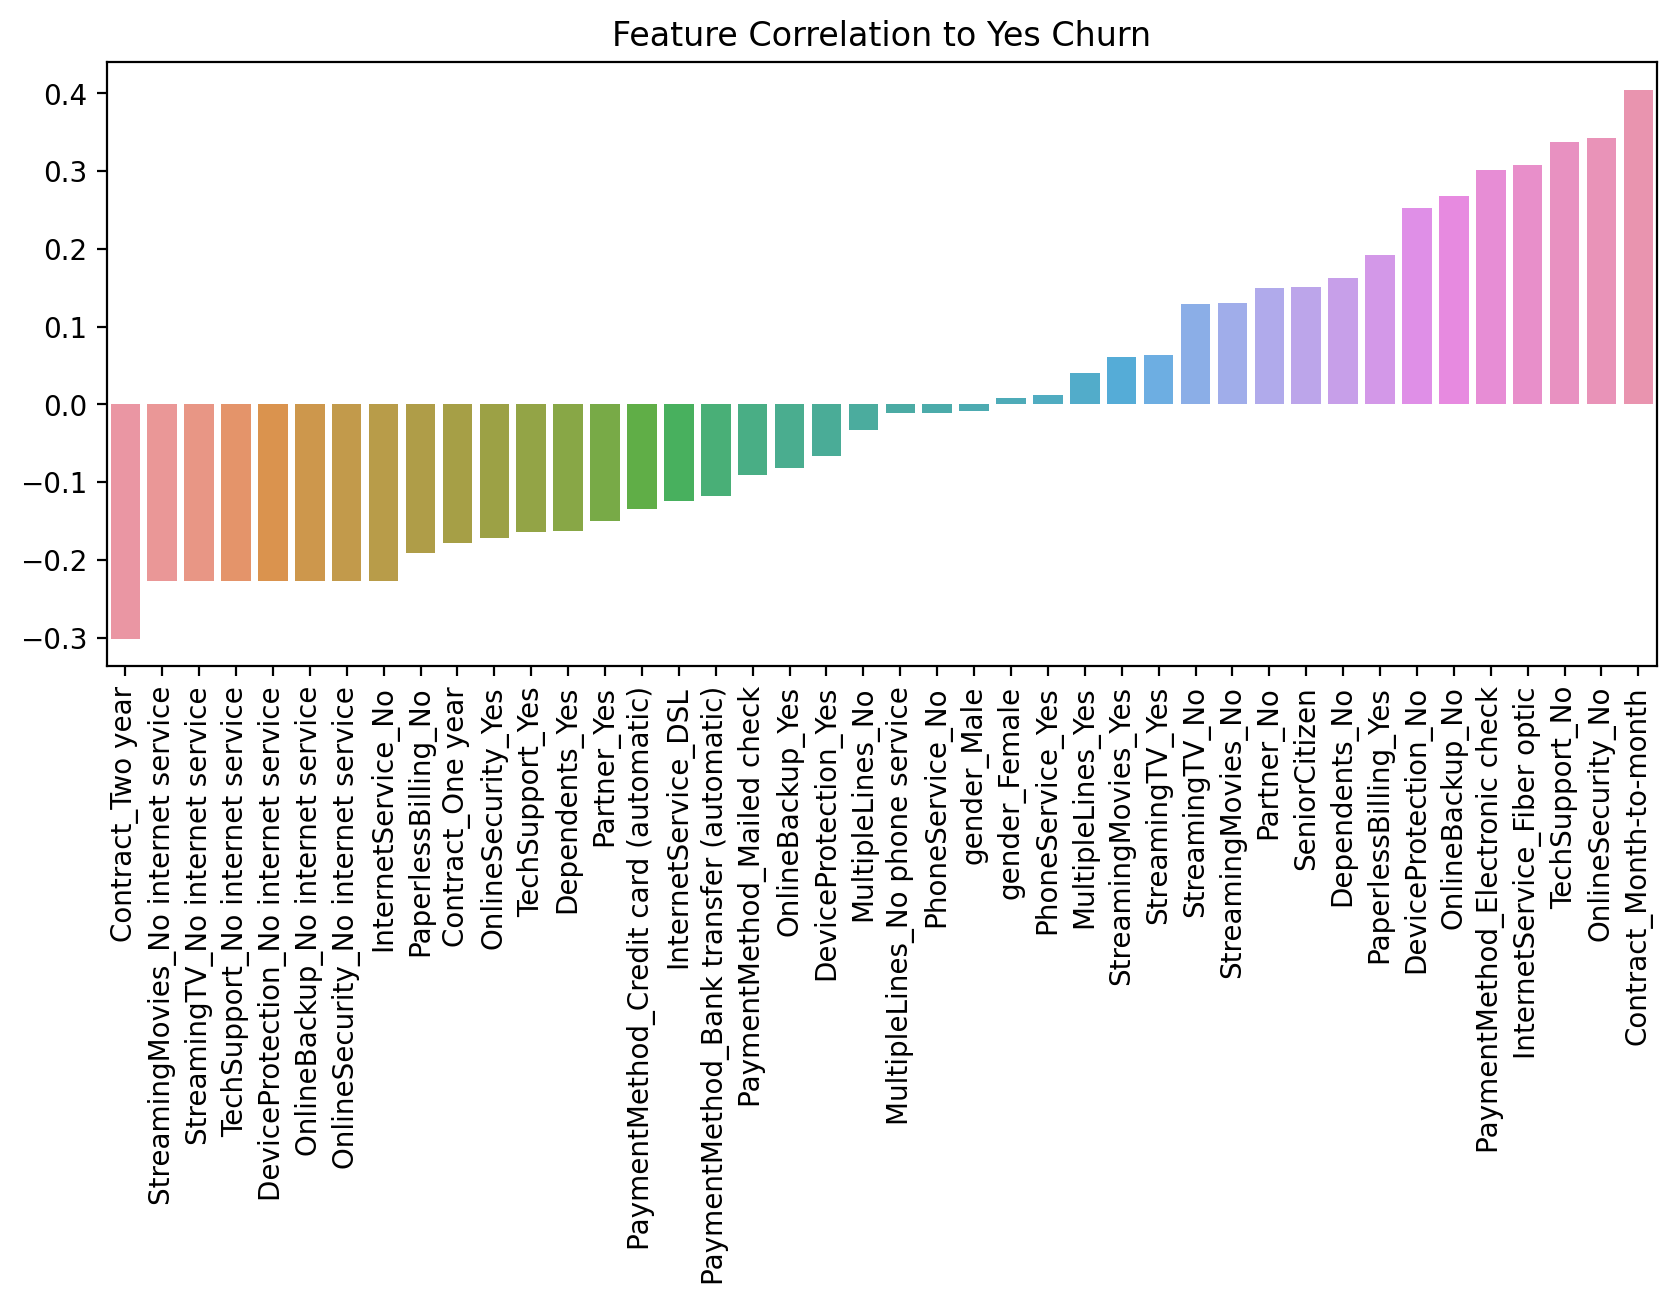

In [21]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,
            y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**What are the 3 contract types available?**

In [33]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

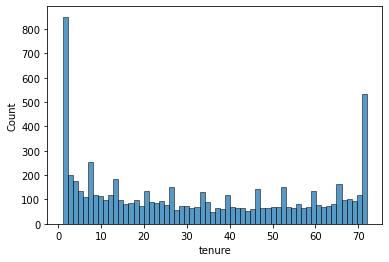

In [38]:
sns.histplot(data=df,x='tenure',bins=60);

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

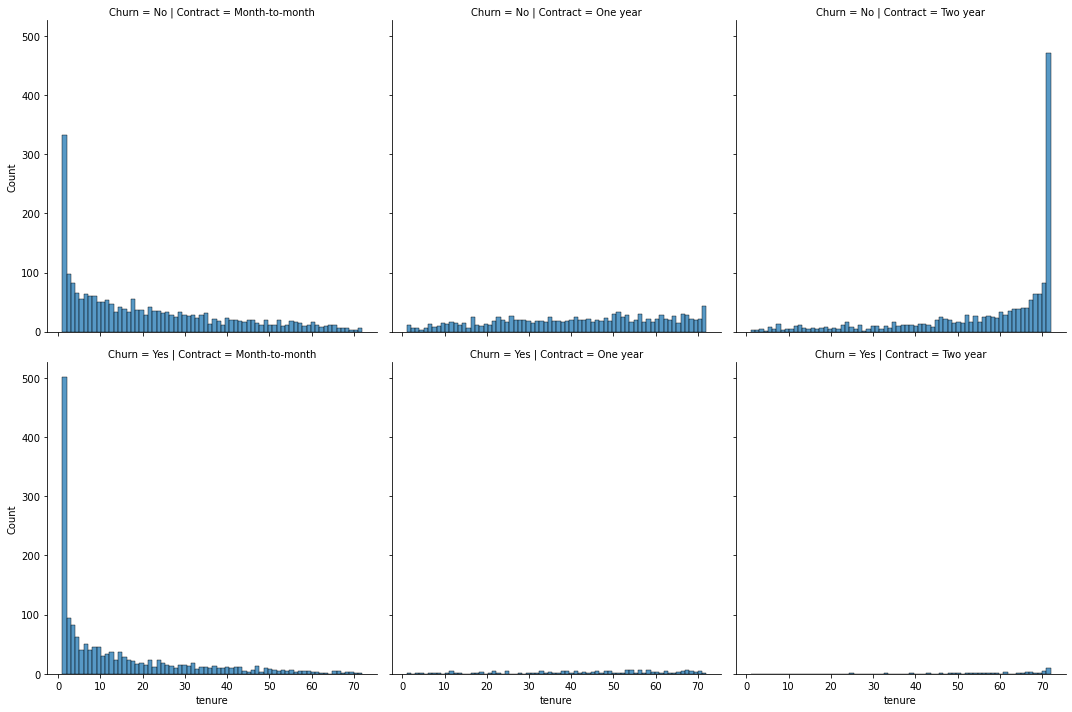

In [42]:
sns.displot(data=df,
            x='tenure',bins=70,
            col='Contract',row='Churn');

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

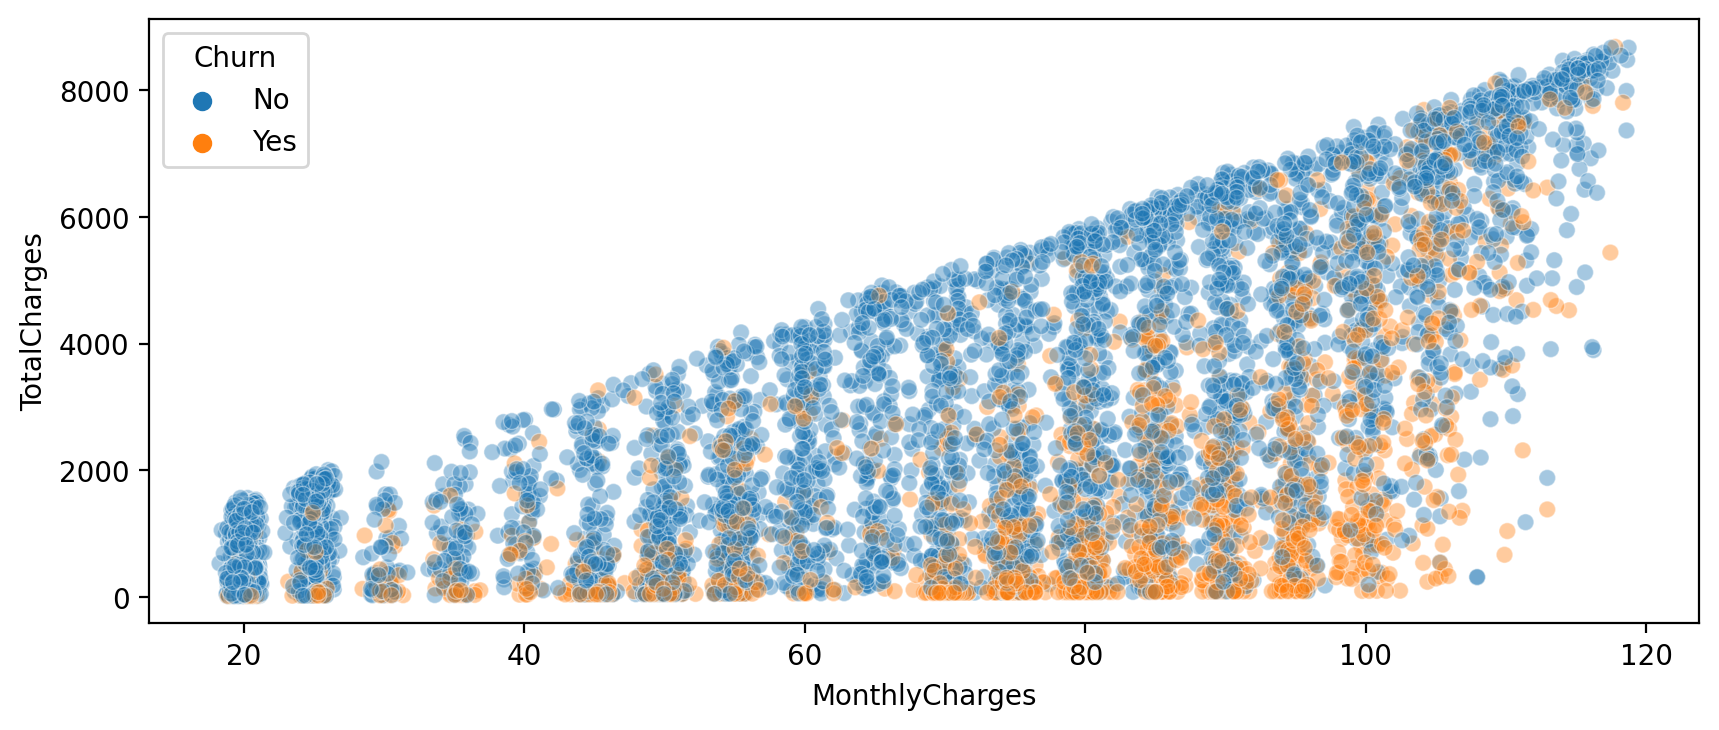

In [51]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',
                hue='Churn',alpha=0.4,lw=0.3);

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [54]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [55]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [56]:
churn_rate = yes_churn/(no_churn+yes_churn) * 100

**Now that we have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

<AxesSubplot:xlabel='tenure'>

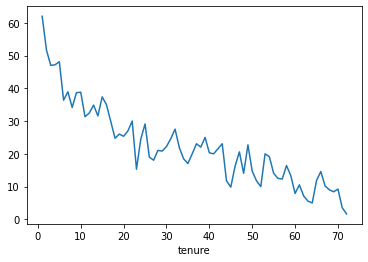

In [60]:
churn_rate.transpose()['customerID'].plot()

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [61]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [62]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [64]:
df[['tenure','Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

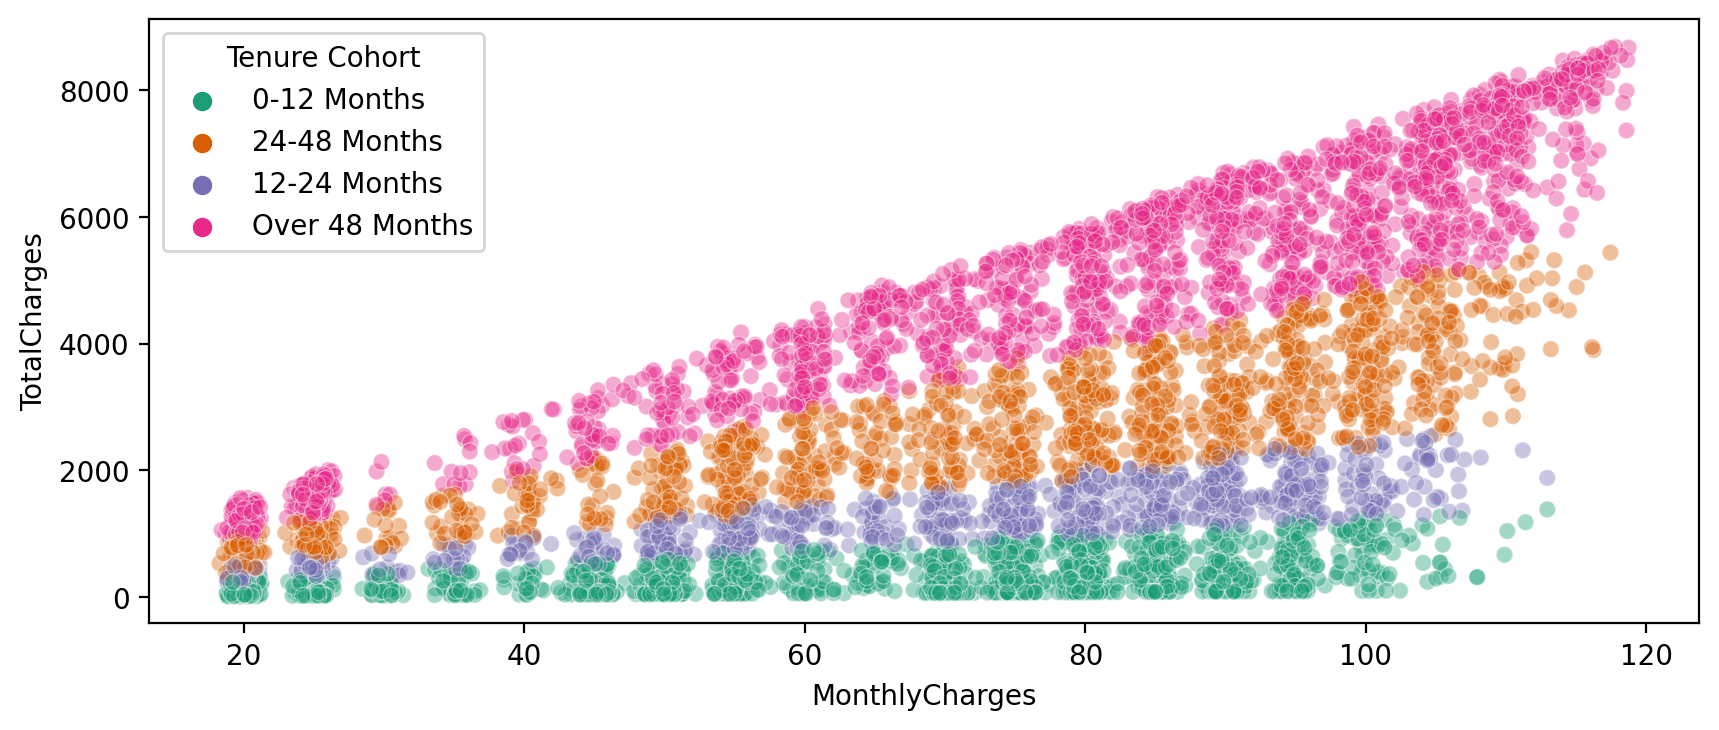

In [65]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',
                hue='Tenure Cohort',alpha=0.4,lw=0.3,palette='Dark2');

**TASK: Create a count plot showing the churn count per cohort.**

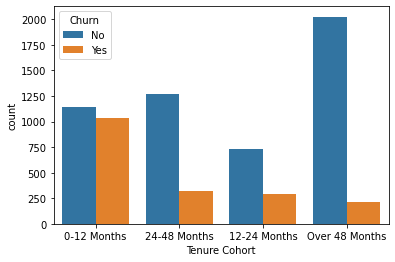

In [67]:
sns.countplot(data=df,x='Tenure Cohort',hue='Churn');

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

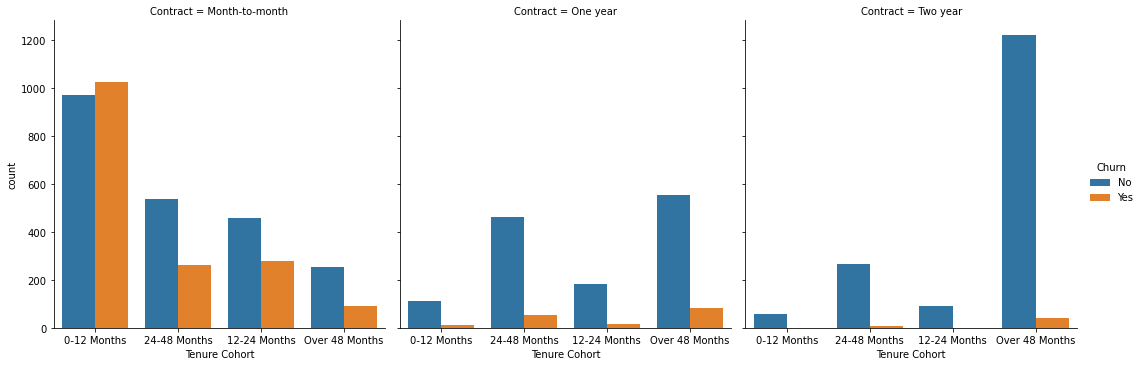

In [70]:
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',
            kind='count',col='Contract');

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [71]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Cohort'],
      dtype='object')

In [76]:
X = df.drop(['Churn','customerID'],axis=1)

In [77]:
X = pd.get_dummies(X,drop_first=True)

In [79]:
y = df['Churn']

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [ ]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dt = DecisionTreeClassifier(max_depth=6)

In [85]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [87]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [89]:
dt_predict = dt.predict(X_test)

In [90]:
print(classification_report(y_test,dt_predict))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



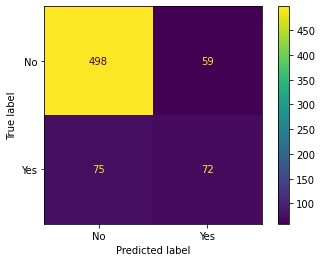

In [92]:
plot_confusion_matrix(dt,X_test,y_test);

In [108]:
feat_imp = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Importance'])

In [112]:
feat_imp = feat_imp[feat_imp['Importance'] > 0].sort_values('Importance')

In [113]:
feat_imp

,Importance
gender_Male,0.001237
OnlineBackup_Yes,0.005341
MultipleLines_No phone service,0.007852
TechSupport_Yes,0.007868
OnlineSecurity_Yes,0.008376
Contract_One year,0.010021
SeniorCitizen,0.010825
MultipleLines_Yes,0.012432
StreamingTV_No internet service,0.026290
Contract_Two year,0.027065


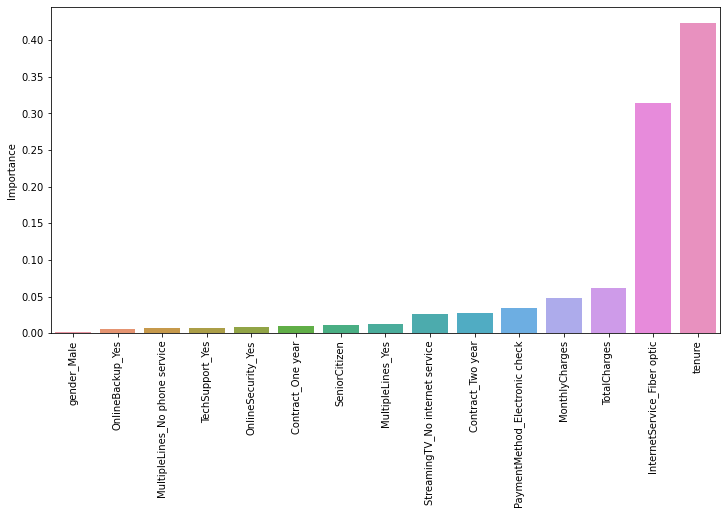

In [119]:
plt.figure(figsize=(12,6))
sns.barplot(data=feat_imp,x=feat_imp.index,y='Importance')
plt.xticks(rotation=90);

In [120]:
from sklearn.tree import plot_tree

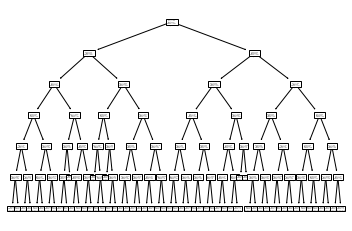

In [122]:
plot_tree(dt);

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rfc = RandomForestClassifier(max_depth=6)

In [129]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [130]:
rfc_preds = rfc.predict(X_test)

In [131]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.61      0.46      0.52       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.82       704



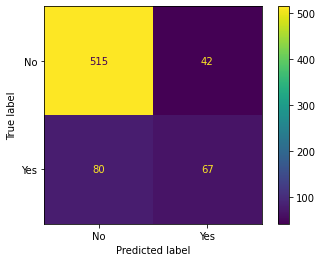

In [132]:
plot_confusion_matrix(rfc,X_test,y_test);

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [141]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [134]:
gbc = GradientBoostingClassifier()

In [135]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [137]:
gbc_preds = gbc.predict(X_test)

In [138]:
print(classification_report(y_test,gbc_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



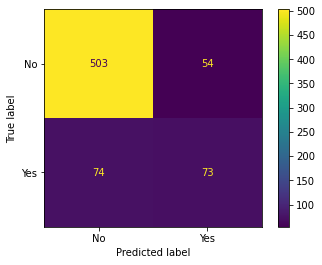

In [140]:
plot_confusion_matrix(gbc,X_test,y_test);

**TASK: Analyze your results, which model performed best for you?**

In [150]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [151]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [152]:
ada_pred = ada_model.predict(X_test)

In [153]:
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



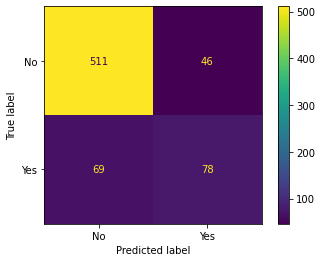

In [154]:
plot_confusion_matrix(ada_model,X_test,y_test);